## Table of Contents:
1. [Load in the Data](#first)
2. [Create Vectorized Combined Dataframe](#second)
3. [Chi Squared Test](#third)
4. [Splitting the Dataset](#fourth)
5. [Logistic Regression](#fifth)
6. [Random Forest](#sixth)
7. [Decision Tree](#seventh)
8. [Comparing Model Results](#eigth)
9. [Feature Importance](#ninth)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Assuming you are using Google Colab, running this cell will clone the entire repository into Colab
!git clone https://github.com/RiceD2KLab/DSCI400_Sp23.git

Cloning into 'DSCI400_Sp23'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 169 (delta 49), reused 85 (delta 45), pack-reused 77
Receiving objects: 100% (169/169), 1.48 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [3]:
#Go to repository folder containing Jupyter notebooks and python files to run
%cd DSCI400_Sp23

/content/DSCI400_Sp23


In [4]:
#Import all functions defined for data cleaning and data vectorization
from data_cleaning_functions import *
from data_vectorization_function import *

In [5]:
# import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
import scipy.stats as stats
import matplotlib.patches as mpatches



#Load in the Data <a name="first"></a>

Before loading in our data, we wanted to find the shared questions (features) across all years. Using the 2016 csv OSMI dataset, we assigned an integer to each question. For each question from 2016, we went through the 2017-2021 datasets to find questions that asked the same things (even if the wording was slightly different) and assigned shared questions across all years the same integer. If a question did not appear in all years from 2016-2021 surveys, that question did not get assigned an integer. A row containing these integers was added as the first row in each year's dataset.


In [6]:
#Load in raw data csv's updated with row containing number labels
#Download 2016-2021 csv files from data folder in github repository
#Click on "Files" tab on left-hand side and upload 2016-2021 csv files 

df2016Updated = pd.read_csv('/content/2016updated.csv')
df2017Updated = pd.read_csv('/content/2017updated.csv')
df2018Updated = pd.read_csv('/content/2018updated.csv')
df2019Updated = pd.read_csv('/content/2019updated.csv')
df2020Updated = pd.read_csv('/content/2020updated.csv')
df2021Updated = pd.read_csv('/content/2021updated.csv')

#Create Vectorized Combined Dataframe <a name="second"></a>

Use makeTextMatrix function defined in data_cleaning_functions python file and vectorizeDataframe function defined in data_vectorization_function file to create vectorized dataframes combining all years data between 2016-2021.

In [7]:
#Create combined text matrix of all 6 years
dfCombined = makeTextMatrix(df2016Updated, df2017Updated, df2018Updated, df2019Updated, df2020Updated, df2021Updated)

#Create precovid matrix concatenating 2016-2019 years' data
dfPreCovid = makePreCovidMatrix(df2016Updated, df2017Updated, df2018Updated, df2019Updated)

#Create during matrix concatenating 2020-2021 years' data
dfDuringCovid = makeDuringCovidMatrix(df2020Updated, df2021Updated)

#filter out features with more than 30% null values
dfCombinedFinal, dfPreCovidFinal, dfDuringCovidFinal = filterNull(dfCombined, dfPreCovid, dfDuringCovid)

#vectorize dfCombinedFinal
dfCombinedVectorized = vectorizeDataframe(dfCombinedFinal)

#drop features deemed unwanted from data exploration
dfCombinedVectorized.drop(['51', '52', '1', '25'], axis=1, inplace=True)
dfCombinedVectorized


/content/DSCI400_Sp23/data_cleaning_functions.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCombined[54].loc[dfCombined[54].isin(male)] = 'male'
/content/DSCI400_Sp23/data_cleaning_functions.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCombined[54].loc[dfCombined[54].isin(female)] = 'female'
/content/DSCI400_Sp23/data_cleaning_functions.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPreCovid[54].loc[dfPreC

,2,3,5,6,7,8,9,10,13,14,...,40,41,43,44,45,50,53,54,55,57
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,8,0,1,3.0,1,1,29.0,1,0,0
5,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,...,8,3,1,3.0,1,1,43.0,-1,0,0
6,5.0,1.0,1.0,-1.0,0.0,1.0,1.0,1.0,1.0,2.0,...,8,3,0,0.0,1,1,42.0,-1,1,1
7,2.0,1.0,-1.0,0.0,0.0,0.0,-1.0,1.0,1.0,2.0,...,-1,0,0,0.0,0,0,30.0,-1,0,0
8,5.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,...,8,2,1,3.0,1,1,37.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,...,10,2,1,3.0,1,1,30.0,-1,0,0
121,5.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,...,8,0,1,2.0,0,0,37.0,-1,1,1
123,5.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,...,9,2,-1,2.0,1,1,35.0,-1,0,0
125,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,2.0,2.0,...,10,1,0,0.0,0,0,46.0,-1,0,0


#Chi-Squared Test <a name="third"></a>

We used the chi-squared test to identify features that have statistically significant associations with the output variable. We then selected those features as input variables for our machine learning models.



In [8]:
# Define the output variable and the input features

outputVar = '45'
inputVars = dfCombinedVectorized.drop('45', axis=1).columns

# Calculate the contingency tables and the chi-squared statistic for each input variable
for var in inputVars:
    # Create a contingency table
    contingencyTable = pd.crosstab(dfCombinedVectorized[outputVar], dfCombinedVectorized[var])
    
    # Calculate the chi-squared statistic and the p-value
    chi2, p, _, _ = stats.chi2_contingency(contingencyTable)
    
    # Print the results
    print(f'Chi-squared test for {var} and {outputVar}:')
    print(f'Chi-squared statistic = {chi2:.4f}, p-value = {p:.4f}')

Chi-squared test for 2 and 45:
Chi-squared statistic = 10.4373, p-value = 0.0638
Chi-squared test for 3 and 45:
Chi-squared statistic = 0.2392, p-value = 0.6248
Chi-squared test for 5 and 45:
Chi-squared statistic = 99.0196, p-value = 0.0000
Chi-squared test for 6 and 45:
Chi-squared statistic = 133.1292, p-value = 0.0000
Chi-squared test for 7 and 45:
Chi-squared statistic = 5.3285, p-value = 0.0697
Chi-squared test for 8 and 45:
Chi-squared statistic = 12.9713, p-value = 0.0015
Chi-squared test for 9 and 45:
Chi-squared statistic = 4.7629, p-value = 0.0924
Chi-squared test for 10 and 45:
Chi-squared statistic = 21.3645, p-value = 0.0016
Chi-squared test for 13 and 45:
Chi-squared statistic = 6.7443, p-value = 0.0343
Chi-squared test for 14 and 45:
Chi-squared statistic = 0.5740, p-value = 0.7505
Chi-squared test for 26 and 45:
Chi-squared statistic = 66.6645, p-value = 0.0000
Chi-squared test for 27 and 45:
Chi-squared statistic = 49.0399, p-value = 0.0000
Chi-squared test for 28 and

<ipython-input-9-bd96dda9e9f2>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(inputVarsSorted, rotation=90)


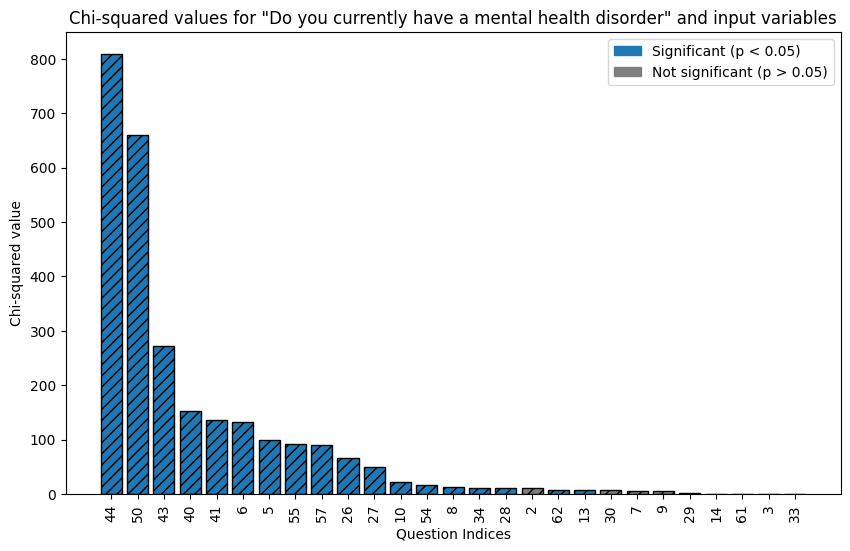

In [9]:
outputVar = '45'
inputVars = dfCombinedVectorized.drop(['45', '53'], axis=1).columns #drop output variable and age (continuous variable so chi-squared test won't apply)
chiValues = []
colors = []

# Calculate the contingency tables and the chi-squared statistic for each input variable
for var in inputVars:
    # Create a contingency table
    contingencyTable = pd.crosstab(dfCombinedVectorized[outputVar], dfCombinedVectorized[var])
    
    # Calculate the chi-squared statistic and the p-value
    chi2, p, _, _ = stats.chi2_contingency(contingencyTable)
    
    # Append the chi-squared value to the list
    chiValues.append(chi2)
    
    # Set the color of the bar based on the p-value
    if p < 0.05:
        colors.append('tab:blue')
    else:
        colors.append('tab:gray')

# Sort the input variables in descending order of their corresponding chi-squared values
inputVarsSorted, chiValuesSorted, colorsSorted = zip(*sorted(zip(inputVars, chiValues, colors), key=lambda x: x[1], reverse=True))

# Create a bar plot of the chi-squared values
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(inputVarsSorted, chiValuesSorted, color=colorsSorted, hatch='/'*3, edgecolor='black')
ax.set_xticklabels(inputVarsSorted, rotation=90)
ax.set_ylabel('Chi-squared value')
ax.set_xlabel('Question Indices')
ax.set_title(f'Chi-squared values for "Do you currently have a mental health disorder" and input variables')

# Create legend patches
blue_patch = mpatches.Patch(color='tab:blue', label='Significant (p < 0.05)')
gray_patch = mpatches.Patch(color='tab:gray', label='Not significant (p > 0.05)')

# Add legend
ax.legend(handles=[blue_patch, gray_patch])

plt.show()

In [10]:
#Selecting features based on Chi-squared test
dfFeatureSelected = dfCombinedVectorized.drop(['2', '30', '7', '9', '29', '14', '61', '3', '33'], axis=1)



#Splitting the Dataset <a name="fourth"></a>

In [11]:
# split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(dfFeatureSelected.drop('45', axis=1), dfFeatureSelected['45'], test_size=0.2, random_state = 0)

# Logistic Regression <a name="fifth"></a>


###Tune the hyperparameters of the logistic regression model

In [12]:

# Choose a performance metric
scoringMetric = 'accuracy'

# Select a range of values for the regularization parameter
regParams = np.logspace(-4, 4, 9)

# Loop over the regularization parameter values
bestScore = 0
bestRegParam = None
for regParam in regParams:
    # Create a logistic regression model with L1 or L2 regularization
    if regParam == 0:
        l1Regularization = False
    else:
        l1Regularization = True
    if l1Regularization:
        model = LogisticRegression(penalty='l1', C=regParam, solver='liblinear')
    else:
        model = LogisticRegression(penalty='l2', C=1/regParam, solver='lbfgs')
    
    # Fit the model on the training data
    model.fit(xTrain, yTrain)
    
    # Evaluate the model on the testing data
    YPred = model.predict(xTest)
    score = accuracy_score(yTest, YPred)
    
    # Update the best score and regularization parameter
    if score > bestScore:
        bestScore = score
        bestRegParam = regParam

# Print the best regularization parameter and score
print('Best regularization parameter:', bestRegParam)
print('Best', scoringMetric, 'score:', bestScore)


Best regularization parameter: 0.1
Best accuracy score: 0.8382352941176471


###Train the logistic regression model on optimized hyperparameters

In [13]:
# create a logistic regression object
logReg = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')


# train the model on the training data
logReg.fit(xTrain, yTrain)

# make predictions on the testing data
logRegpredictions = logReg.predict(xTest)

# evaluate the model performance on test data
logRegAccuracy = accuracy_score(yTest, logRegpredictions)
logRegF1score = f1_score(yTest, logRegpredictions)
logRegconfusionMatrix = confusion_matrix(yTest, logRegpredictions)

# make predictions on the training data
logRegpredictionsTrain = logReg.predict(xTrain)

#evaluate on train data 
logRegAccuracyTrain = accuracy_score(yTrain, logRegpredictionsTrain)
logRegF1scoreTrain = f1_score(yTrain, logRegpredictionsTrain)
logRegconfusionMatrix = confusion_matrix(yTrain, logRegpredictionsTrain)

print("TestAccuracy:", logRegAccuracy)
print("Test F1 score:", logRegF1score)
print("Test Confusion matrix:", logRegconfusionMatrix)

print("Train Accuracy:", logRegAccuracyTrain)
print("Train F1 score:", logRegF1scoreTrain)
print("Train Confusion matrix:", logRegpredictionsTrain)


TestAccuracy: 0.8382352941176471
Test F1 score: 0.819672131147541
Test Confusion matrix: [[735 211]
 [115 571]]
Train Accuracy: 0.8002450980392157
Train F1 score: 0.7779291553133515
Train Confusion matrix: [1 0 0 ... 0 1 1]


#Random Forest <a name="sixth"></a>



Tune the hyperparameters of the random forest model

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

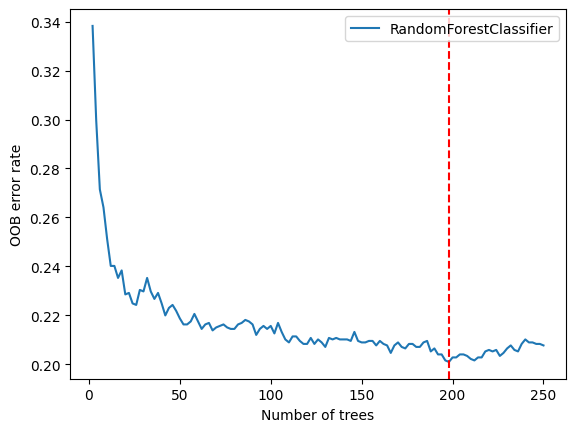

Optimal number of tree: 198


In [15]:
#Tune random forest classifier number of trees by plotting a oob error rate per tree number
from collections import OrderedDict
ensemble_clfs = [
    (
        "RandomForestClassifier",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
minTreeNum = 2
maxTreeNum = 250

for label, clf in ensemble_clfs:
    for i in range(minTreeNum, maxTreeNum+1 , 2):
        #print(i)
        clf.set_params(n_estimators=i, random_state=0)
        clf.fit(xTrain, yTrain)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        #print(oob_error)
        error_rate[label].append((i, oob_error))
        

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


idx = np.argmin(ys)
xMin = xs[idx]

plt.axvline(xMin, color='r', linestyle='--')


plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

print("Optimal number of tree:", xMin)


###Train random forest model with optimized hyperparameters

In [16]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=198, random_state=42)
rfc.fit(xTrain, yTrain)

# make predictions on testing data
rfPrediction = rfc.predict(xTest)

#print out results
rfAccuracy = accuracy_score(yTest, rfPrediction)
rfF1score = f1_score(yTest, rfPrediction)
rfConfusionMatrix = confusion_matrix(yTest, rfPrediction)

# make predictions on the training data
rfPredictionsTrain = rfc.predict(xTrain)

#evaluate on train data 
rfAccuracyTrain = accuracy_score(yTrain, rfPredictionsTrain)
rfF1scoreTrain = f1_score(yTrain, rfPredictionsTrain)



print("Accuracy:", rfAccuracy)
print("F1 score:", rfF1score)
print("Confusion matrix:", rfConfusionMatrix)

Accuracy: 0.8284313725490197
F1 score: 0.8044692737430167
Confusion matrix: [[194  39]
 [ 31 144]]


#Decision Tree <a name="seventh"></a>

###Tune the hyperparameters of decision tree model

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters to tune and their distribution
param_dist = {'max_depth': [3, 5, 7, None],
              'min_samples_split': randint(2, 11)}

# Create the decision tree classifier model
dt = DecisionTreeClassifier(random_state=42)

# Use random search to find the best hyperparameters
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(xTrain, yTrain)

# Print the best hyperparameters and evaluation score
print("Best hyperparameters: ", random_search.best_params_)
print("Best evaluation score: ", random_search.best_score_)


Best hyperparameters:  {'max_depth': 3, 'min_samples_split': 9}
Best evaluation score:  0.7837057466088816


###Train decision tree model using optimized hyperparameters

In [19]:
#Run decision tree using tuned parameters
dtc = DecisionTreeClassifier(max_depth=3, min_samples_split=9, random_state=42)
dtc.fit(xTrain, yTrain)

decisionTreePrediction = dtc.predict(xTest)

decisionTreeAccuracy = accuracy_score(yTest, decisionTreePrediction)
decisionTreeF1score = f1_score(yTest, decisionTreePrediction)
decisionTreeConfusionMatrix = confusion_matrix(yTest, decisionTreePrediction)


# make predictions on the training data
decisionTreePredictionTrain = dtc.predict(xTrain)

#evaluate on train data 
decisionTreeAccuracyTrain = accuracy_score(yTrain, decisionTreePredictionTrain)
decisionTreeF1scoreTrain = f1_score(yTrain, decisionTreePredictionTrain)



print("Accuracy:", decisionTreeAccuracy)
print("F1 score:", decisionTreeF1score)
print("Confusion matrix:", decisionTreeConfusionMatrix)

Accuracy: 0.8651960784313726
F1 score: 0.8501362397820164
Confusion matrix: [[197  36]
 [ 19 156]]


# Machine Learning Results (Comparing models) <a name="eigth"></a>


###Compare accuracies and F1 scores on test dataset between all three models 

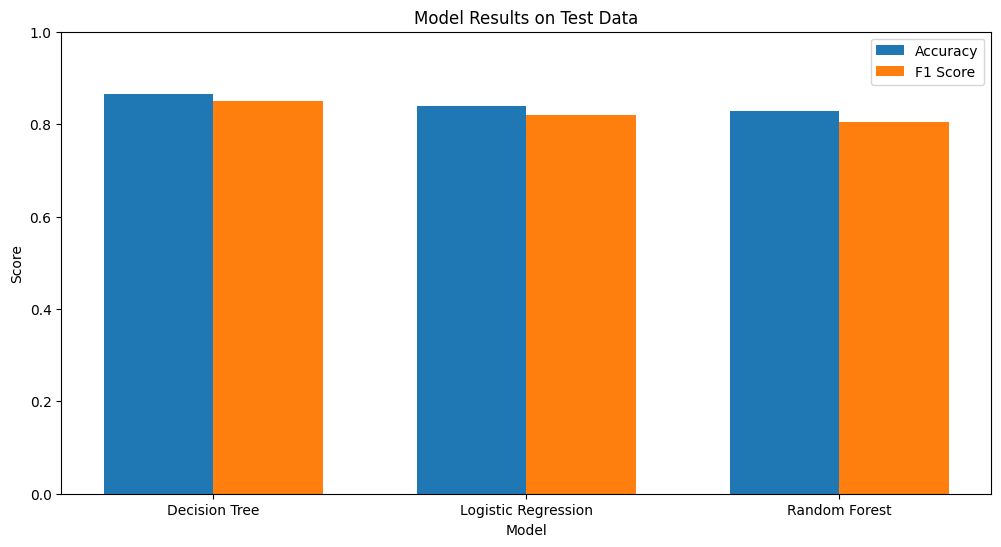

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for the three models
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [decisionTreeAccuracy, logRegAccuracy, rfAccuracy, ]
f1_scores = [decisionTreeF1score, logRegF1score, rfF1score]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a bar graph for accuracies and F1 scores on test data
plt.figure(figsize=(12, 6))
plt.bar(indices, accuracies, bar_width, color='#1f77b4', label='Accuracy')
plt.bar(indices + bar_width, f1_scores, bar_width, color='#ff7f0e', label='F1 Score')
plt.title('Model Results on Test Data')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(indices + bar_width / 2, model_names)
plt.ylim(0, 1)
plt.legend()
plt.show()


###Compare accuracies and F1 scores on training dataset between all three models 

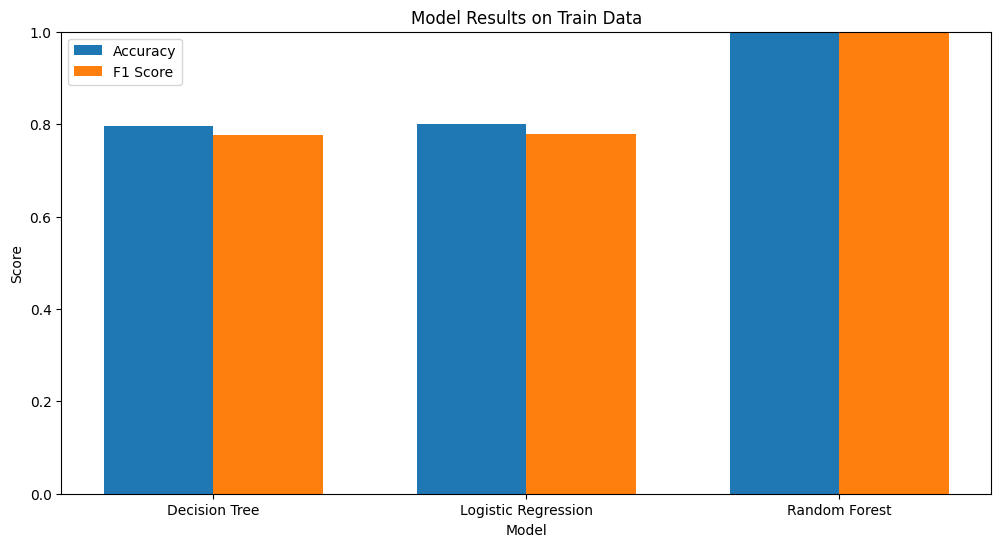

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for the three models
model_names = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracies = [decisionTreeAccuracyTrain, logRegAccuracyTrain , rfAccuracyTrain]
f1_scores = [decisionTreeF1scoreTrain, logRegF1scoreTrain, rfF1scoreTrain]

# Set the width of the bars
bar_width = 0.35

# Create an array of indices for the x-axis
indices = np.arange(len(model_names))

# Create a bar graph for accuracies and F1 scores on training data
plt.figure(figsize=(12, 6))
plt.bar(indices, accuracies, bar_width, color='#1f77b4', label='Accuracy')
plt.bar(indices + bar_width, f1_scores, bar_width, color='#ff7f0e', label='F1 Score')
plt.title('Model Results on Train Data')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(indices + bar_width / 2, model_names)
plt.ylim(0, 1)
plt.legend()
plt.show()


#Feature Importance <a name="ninth"></a>


In this section, we will be exploring the feature importance rankings given by different models.

## All Features

Plotting feature importance rankings with all features

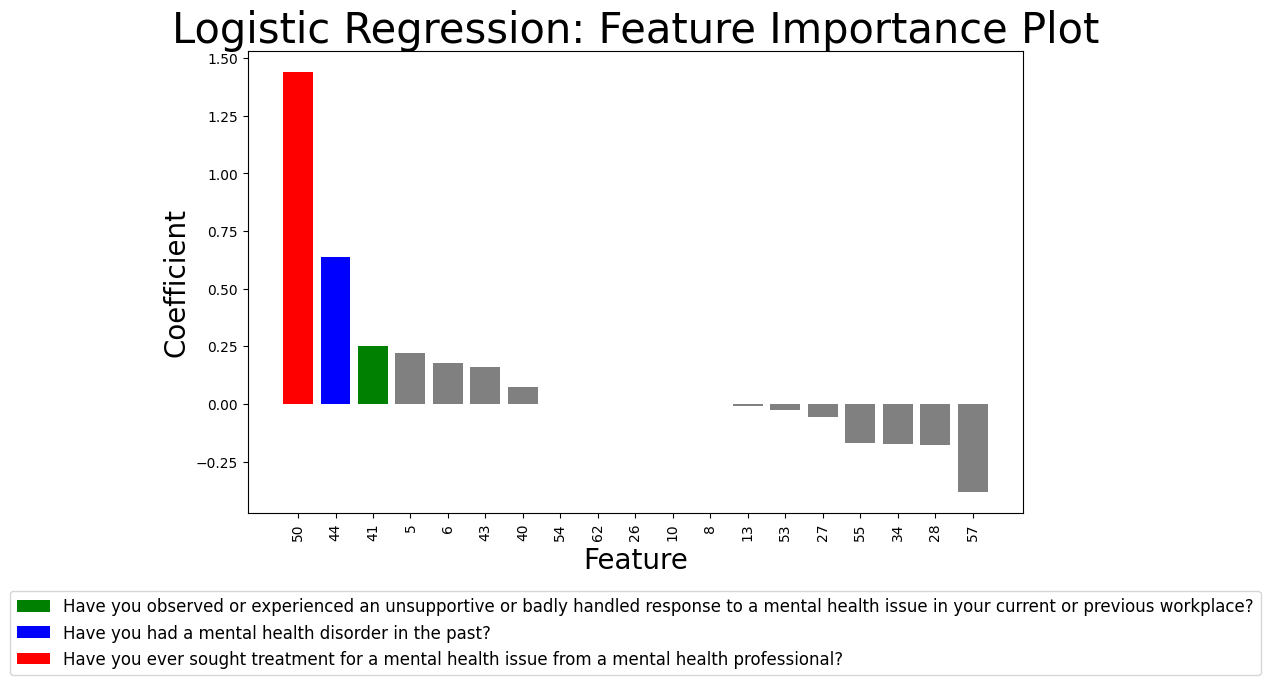

In [22]:
# Get the coefficients and feature names from the logistic regression model
coefs = logReg.coef_[0]
features = xTest.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
coefDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

# Sort the coefficients in descending order of magnitude
coefDataFramePlot = coefDataFramePlot.reindex(coefDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = coefDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red','blue', 'green']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(coefDataFramePlot['Feature'], coefDataFramePlot['Coefficient'], color='grey')
for i in range(len(coefDataFramePlot)):
    if coefDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(coefDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        elif idx == 1:
            label = 'Have you had a mental health disorder in the past?'
        else:
            label = 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
        ax.bar(coefDataFramePlot['Feature'][i], coefDataFramePlot['Coefficient'][i], color= colors[idx], label=label)

ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Coefficient',fontsize = 20)
ax.set_title('Logistic Regression: Feature Importance Plot', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


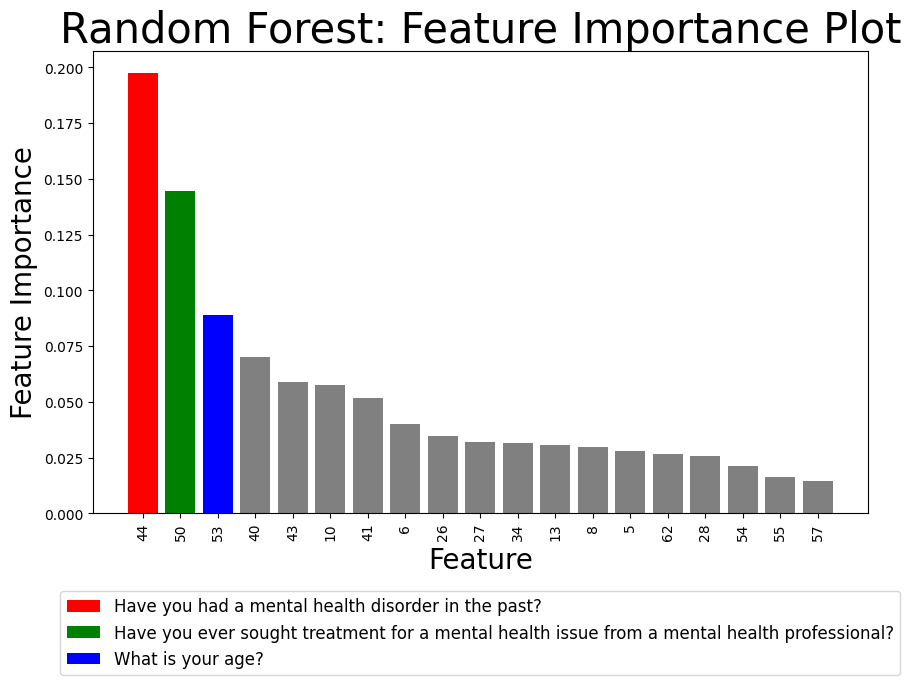

In [24]:
# Get the coefficients and feature names from the random forest model
rfcFeatureImportance = rfc.feature_importances_
features = xTest.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
rfcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(rfcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
rfcDataFramePlot = rfcDataFramePlot.reindex(rfcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = rfcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rfcDataFramePlot['Feature'], rfcDataFramePlot['Coefficient'], color='grey')
for i in range(len(rfcDataFramePlot)):
    if rfcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(rfcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you had a mental health disorder in the past?'
        elif idx == 1:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        else:
            label = 'What is your age?'
        ax.bar(rfcDataFramePlot['Feature'][i], rfcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Random Forest: Feature Importance Plot', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


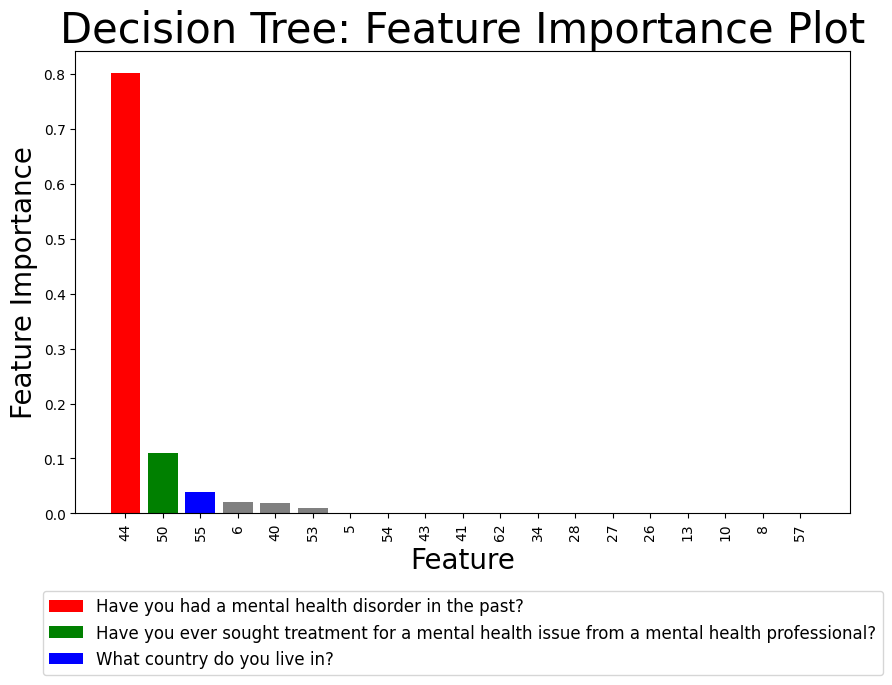

In [25]:
# Get the coefficients and feature names from the decision tree classifier model
dtcFeatureImportance = dtc.feature_importances_
features = xTest.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
dtcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(dtcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
dtcDataFramePlot = dtcDataFramePlot.reindex(dtcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = dtcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dtcDataFramePlot['Feature'], dtcDataFramePlot['Coefficient'], color='grey')
for i in range(len(dtcDataFramePlot)):
    if dtcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(dtcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you had a mental health disorder in the past?'
        elif idx == 1:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        else:
            label = 'What country do you live in?'
        ax.bar(dtcDataFramePlot['Feature'][i], dtcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize=20)
ax.set_ylabel('Feature Importance', fontsize=20)
ax.set_title('Decision Tree: Feature Importance Plot', fontsize=30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


## Work Logistic Features

Plotting feature importance rankings, but only with work logistic related features 

In [26]:
# Setting up the data
# define the list of columns to select for worklogistics
workLogisticColumn = [ '5', '6', '8', '10', '26', '28', '41']

# use .loc to select only the columns in column to select
dfWorkLogistic = dfFeatureSelected.loc[:, workLogisticColumn]


### Logistic Regression

In [27]:
# create a logistic regression object
logRegWorkLogistic = LogisticRegression()

# train the model on the training data
logRegWorkLogistic.fit(dfWorkLogistic, dfCombinedVectorized['45'])


LogisticRegression()

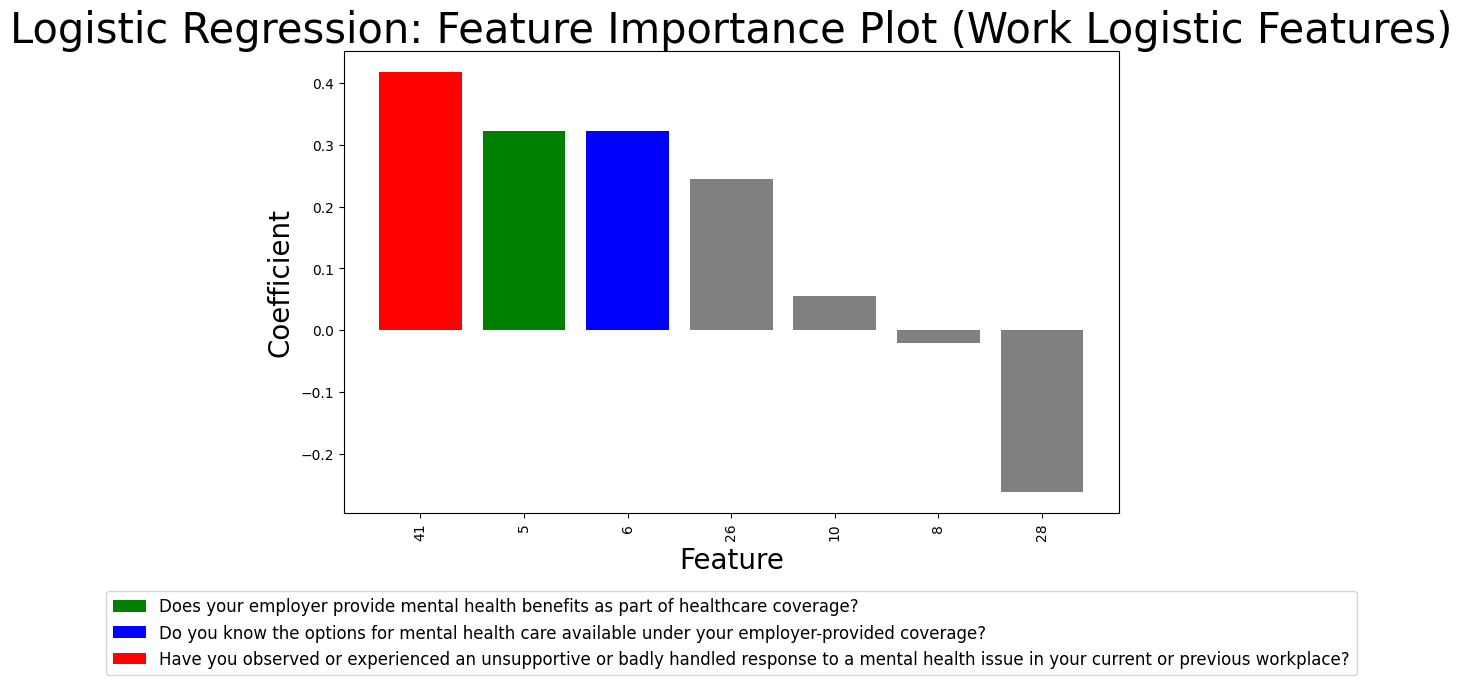

In [28]:
# Get the coefficients and feature names from the logistic regression model
coefs = logRegWorkLogistic.coef_[0]
features = dfWorkLogistic.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
coefDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

# Sort the coefficients in descending order of magnitude
coefDataFramePlot = coefDataFramePlot.reindex(coefDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = coefDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(coefDataFramePlot['Feature'], coefDataFramePlot['Coefficient'], color='grey')
for i in range(len(coefDataFramePlot)):
    if coefDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(coefDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
        elif idx == 1:
            label = 'Does your employer provide mental health benefits as part of healthcare coverage?'
        else:
            label = 'Do you know the options for mental health care available under your employer-provided coverage?'
        ax.bar(coefDataFramePlot['Feature'][i], coefDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Coefficient',fontsize = 20)
ax.set_title('Logistic Regression: Feature Importance Plot (Work Logistic Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()



### Random Forest

In [30]:
# create a random forest object
randomForestWorkLogistic = RandomForestClassifier(n_estimators=198, random_state=42)

# train the model on the training data
randomForestWorkLogistic.fit(dfWorkLogistic, dfCombinedVectorized['45'])



RandomForestClassifier(n_estimators=198, random_state=42)

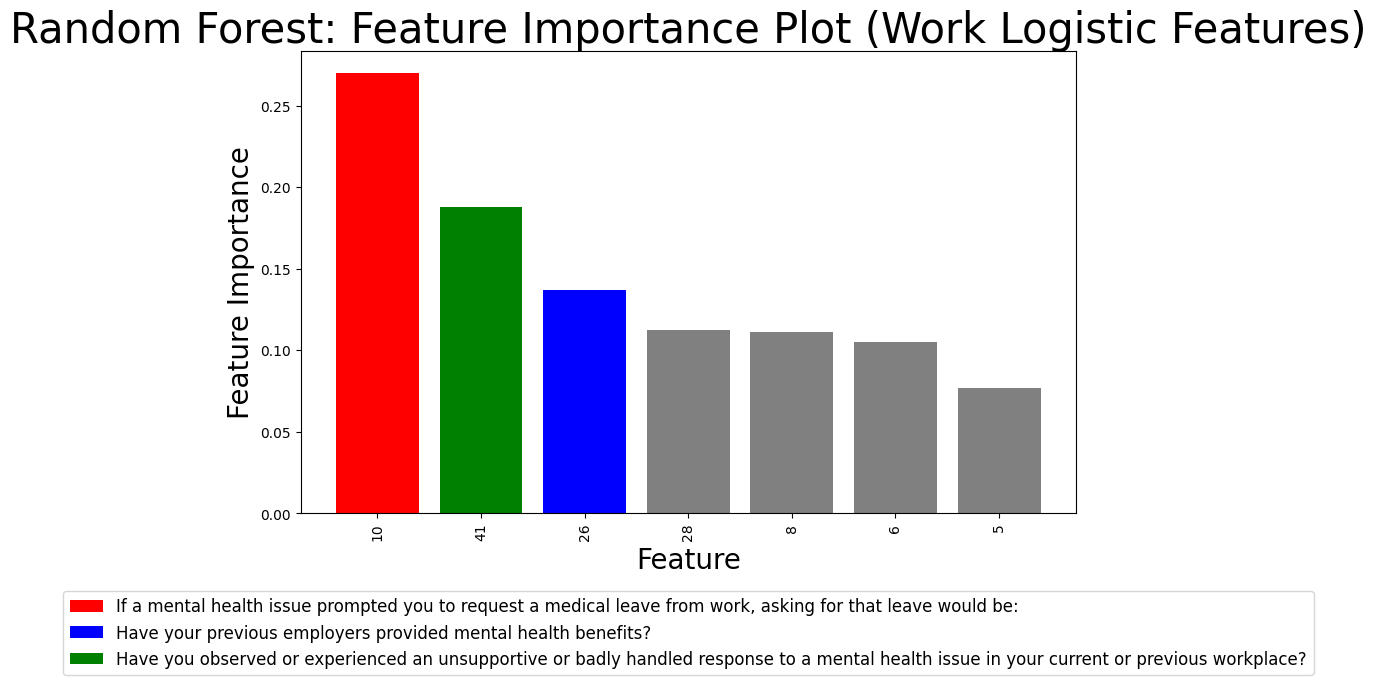

In [31]:
# Get the coefficients and feature names from the random forest model
rfcFeatureImportance = randomForestWorkLogistic.feature_importances_
features = dfWorkLogistic.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
rfcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(rfcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
rfcDataFramePlot = rfcDataFramePlot.reindex(rfcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = rfcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rfcDataFramePlot['Feature'], rfcDataFramePlot['Coefficient'], color='grey')
for i in range(len(rfcDataFramePlot)):
    if rfcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(rfcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
        elif idx == 1:
            label = 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
        else:
            label = 'Have your previous employers provided mental health benefits?'
        ax.bar(rfcDataFramePlot['Feature'][i], rfcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Random Forest: Feature Importance Plot (Work Logistic Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


### Decision Tree

In [32]:
# create a decision tree object
decisionTreeWorkLogistic = DecisionTreeClassifier(max_depth=3, min_samples_split=9, random_state=42)

# train the model on the training data
decisionTreeWorkLogistic.fit(dfWorkLogistic, dfCombinedVectorized['45'])



DecisionTreeClassifier(max_depth=3, min_samples_split=9, random_state=42)

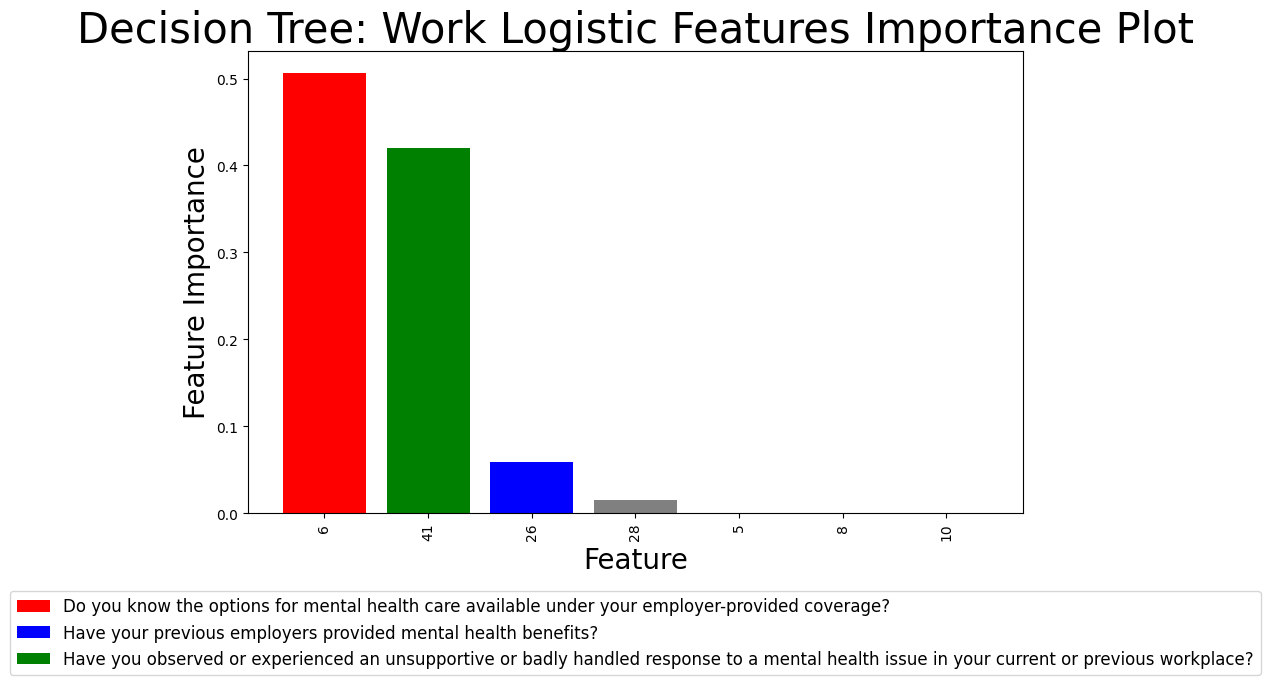

In [51]:
# Get the coefficients and feature names from the logistic regression model
dtcFeatureImportance = decisionTreeWorkLogistic.feature_importances_
features = dfWorkLogistic.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
dtcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(dtcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
dtcDataFramePlot = dtcDataFramePlot.reindex(dtcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = dtcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dtcDataFramePlot['Feature'], dtcDataFramePlot['Coefficient'], color='grey')
for i in range(len(dtcDataFramePlot)):
    if dtcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(dtcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Do you know the options for mental health care available under your employer-provided coverage?'
        elif idx == 1:
            label = 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
        else:
            label = 'Have your previous employers provided mental health benefits?'
        ax.bar(dtcDataFramePlot['Feature'][i], dtcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Decision Tree: Work Logistic Features Importance Plot', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


# Mental Health Medical History Features

Plotting feature importance based on medical history features

In [34]:
# Setting up the data
# define the list of columns to select for mental health medical history
medicalHistoryColumn = [ '43', '44', '50']

# use .loc to select only the columns in column to select
dfMedicalHistory = dfFeatureSelected.loc[:, medicalHistoryColumn]


## Logistic Regression

In [35]:
# create a logistic regression object
logRegMedicalHistory = LogisticRegression()

# train the model on the training data
logRegMedicalHistory.fit(dfMedicalHistory, dfCombinedVectorized['45'])


LogisticRegression()

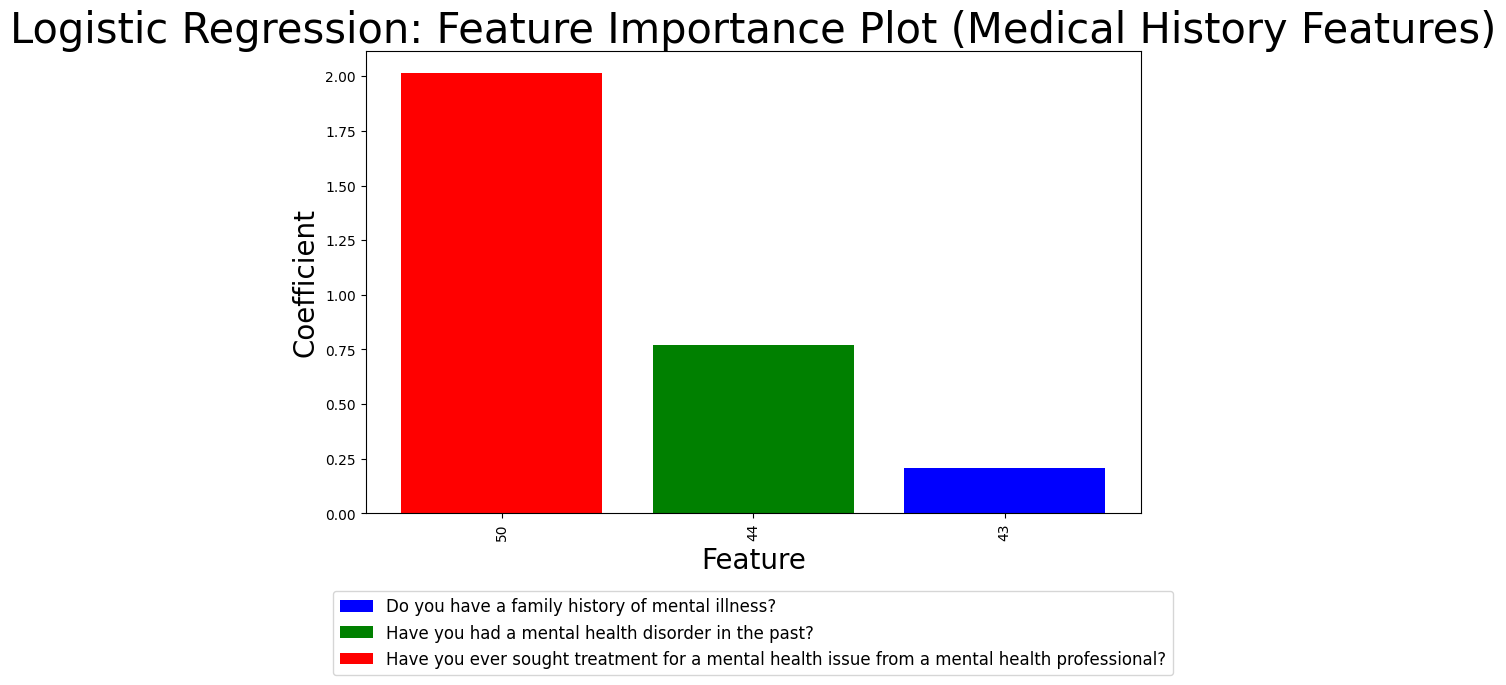

In [36]:
# Get the coefficients and feature names from the logistic regression model
coefs = logRegMedicalHistory.coef_[0]
features = dfMedicalHistory.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
coefDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

# Sort the coefficients in descending order of magnitude
coefDataFramePlot = coefDataFramePlot.reindex(coefDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = coefDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(coefDataFramePlot['Feature'], coefDataFramePlot['Coefficient'], color='grey')
for i in range(len(coefDataFramePlot)):
    if coefDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(coefDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        elif idx == 1:
            label = 'Have you had a mental health disorder in the past?'
        else:
            label = 'Do you have a family history of mental illness?'
        ax.bar(coefDataFramePlot['Feature'][i], coefDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Coefficient',fontsize = 20)
ax.set_title('Logistic Regression: Feature Importance Plot (Medical History Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()



##Random Forest

In [37]:
# create a random forest object
randomForestMedicalHistory = RandomForestClassifier(n_estimators=198, random_state=42)

# train the model on the training data
randomForestMedicalHistory.fit(dfMedicalHistory, dfCombinedVectorized['45'])



RandomForestClassifier(n_estimators=198, random_state=42)

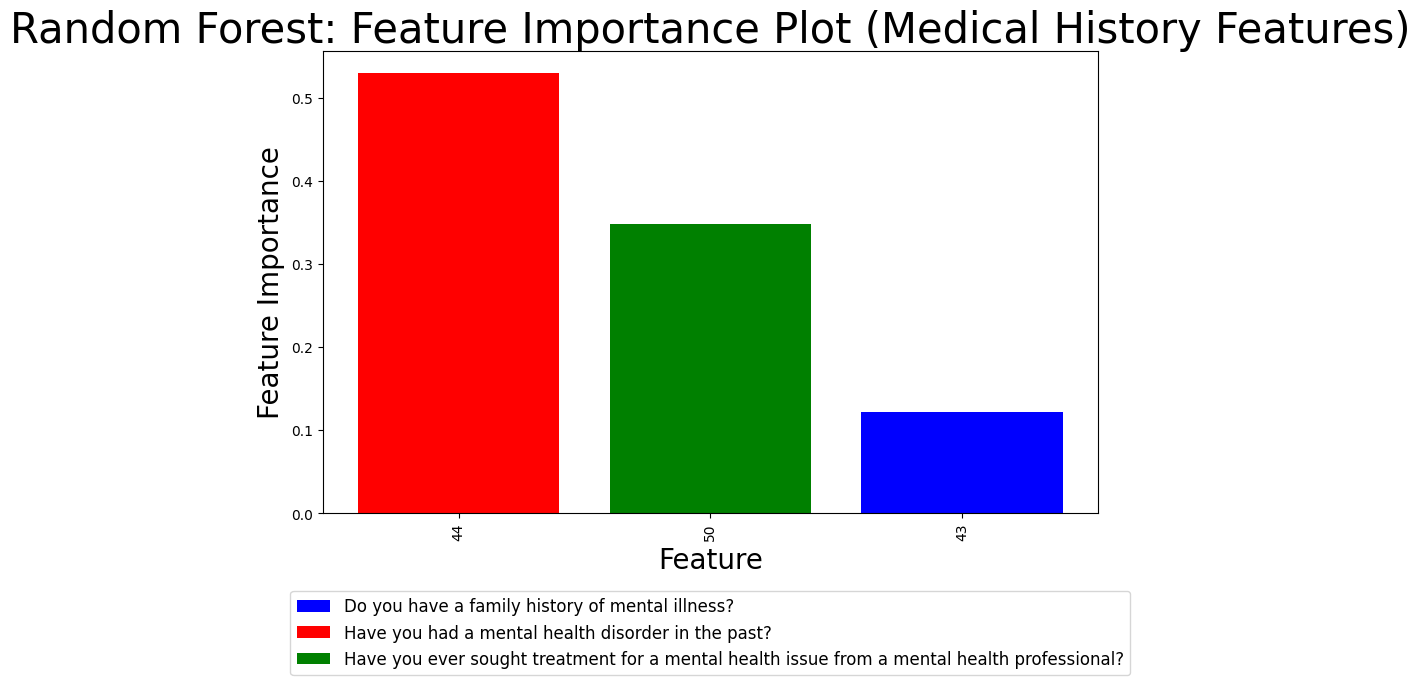

In [38]:
# Get the coefficients and feature names from the random forest model
rfcFeatureImportance = randomForestMedicalHistory.feature_importances_
features = dfMedicalHistory.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
rfcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(rfcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
rfcDataFramePlot = rfcDataFramePlot.reindex(rfcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = rfcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rfcDataFramePlot['Feature'], rfcDataFramePlot['Coefficient'], color='grey')
for i in range(len(rfcDataFramePlot)):
    if rfcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(rfcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you had a mental health disorder in the past?'
        elif idx == 1:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        else:
            label = 'Do you have a family history of mental illness?'
        ax.bar(rfcDataFramePlot['Feature'][i], rfcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Random Forest: Feature Importance Plot (Medical History Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


##Decision Tree

In [39]:
# create a decision forest object
decisionTreeMedicalHistory = DecisionTreeClassifier(random_state=42)

# train the model on the training data
decisionTreeMedicalHistory.fit(dfMedicalHistory, dfCombinedVectorized['45'])



DecisionTreeClassifier(random_state=42)

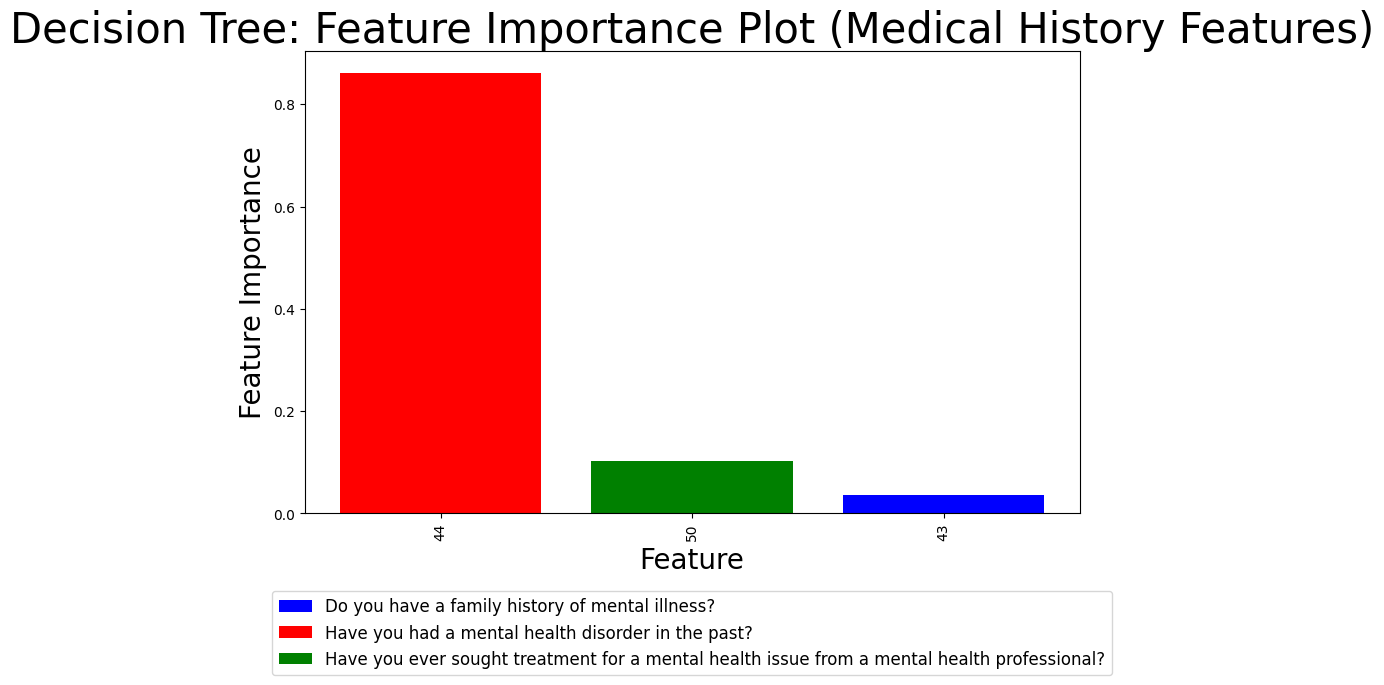

In [41]:
# Get the coefficients and feature names from the decision tree model
dtcFeatureImportance = decisionTreeMedicalHistory.feature_importances_
features = dfMedicalHistory.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
dtcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(dtcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
dtcDataFramePlot = dtcDataFramePlot.reindex(dtcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = dtcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dtcDataFramePlot['Feature'], dtcDataFramePlot['Coefficient'], color='grey')
for i in range(len(dtcDataFramePlot)):
    if dtcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(dtcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Have you had a mental health disorder in the past?'
        elif idx == 1:
            label = 'Have you ever sought treatment for a mental health issue from a mental health professional?'
        else:
            label = 'Do you have a family history of mental illness?'
        ax.bar(dtcDataFramePlot['Feature'][i], dtcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Decision Tree: Feature Importance Plot (Medical History Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()


## Mental Health Perception Features

Plotting feature importance based on perception toward mental health features

In [42]:
# Setting up the data
# define the list of columns to select for mental health perception features
perceptionColumn = [ '13','34','40','62']

# use .loc to select only the columns in perception column 
dfPerception = dfFeatureSelected.loc[:, perceptionColumn]


## Logistic Regression

In [43]:
# create a logistic regression object
logRegPerception = LogisticRegression()

# train the model on the training data
logRegPerception.fit(dfPerception, dfCombinedVectorized['45'])


LogisticRegression()

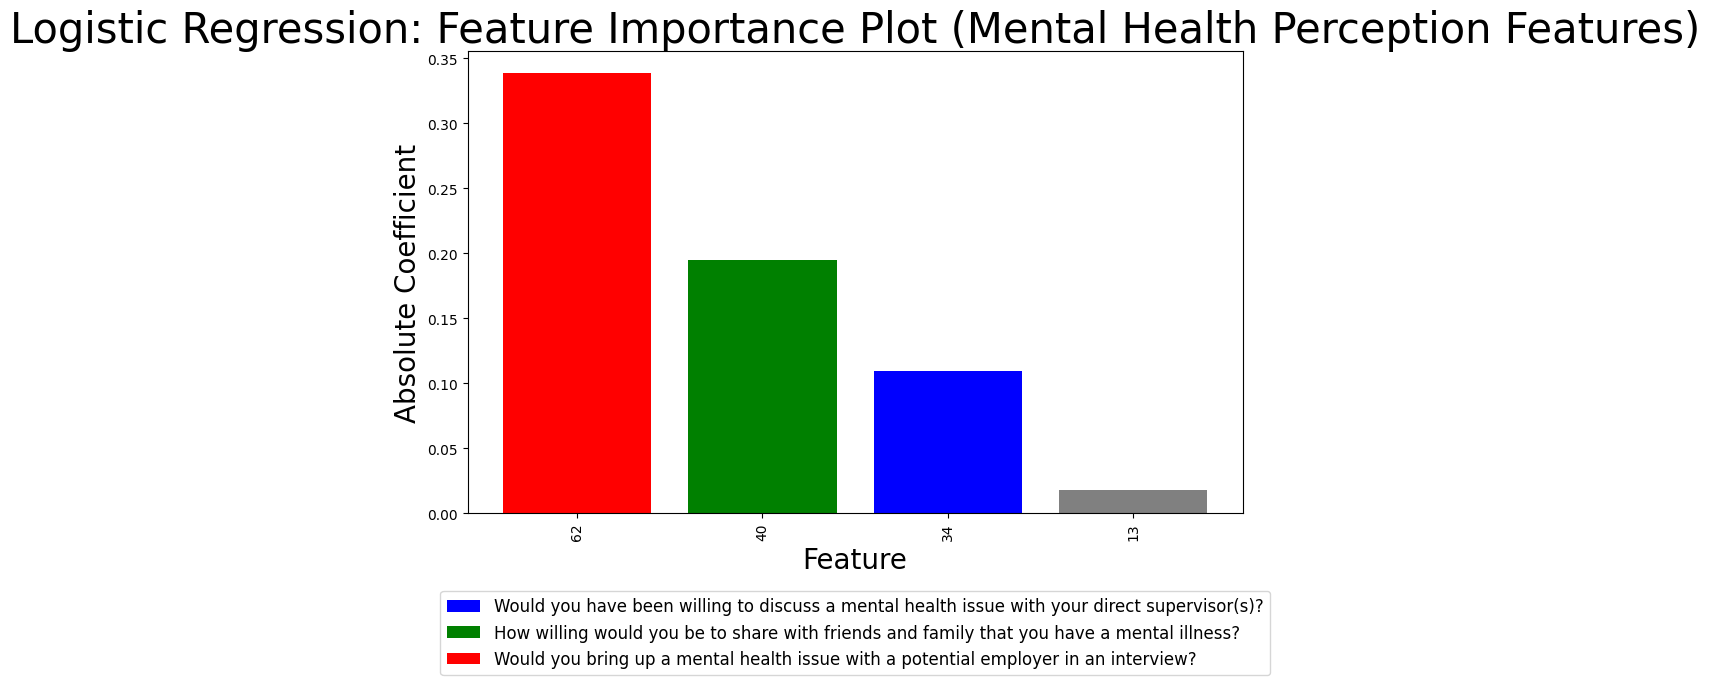

In [44]:
# Get the coefficients and feature names from the logistic regression model
coefs = logRegPerception.coef_[0]
features = dfPerception.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
coefDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(coefs)})

# Sort the coefficients in descending order of magnitude
coefDataFramePlot = coefDataFramePlot.reindex(coefDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = coefDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(coefDataFramePlot['Feature'], coefDataFramePlot['Coefficient'], color='grey')
for i in range(len(coefDataFramePlot)):
    if coefDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(coefDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'Would you bring up a mental health issue with a potential employer in an interview?'
        elif idx == 1:
            label = 'How willing would you be to share with friends and family that you have a mental illness?'
        else:
            label = 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'
        ax.bar(coefDataFramePlot['Feature'][i], coefDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Absolute Coefficient',fontsize = 20)
ax.set_title('Logistic Regression: Feature Importance Plot (Mental Health Perception Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()



##Random Forest

In [45]:
# create a random forest object
randomForestPerception = RandomForestClassifier(n_estimators=198, random_state=42)

# train the model on the training data
randomForestPerception.fit(dfPerception, dfCombinedVectorized['45'])



RandomForestClassifier(n_estimators=198, random_state=42)

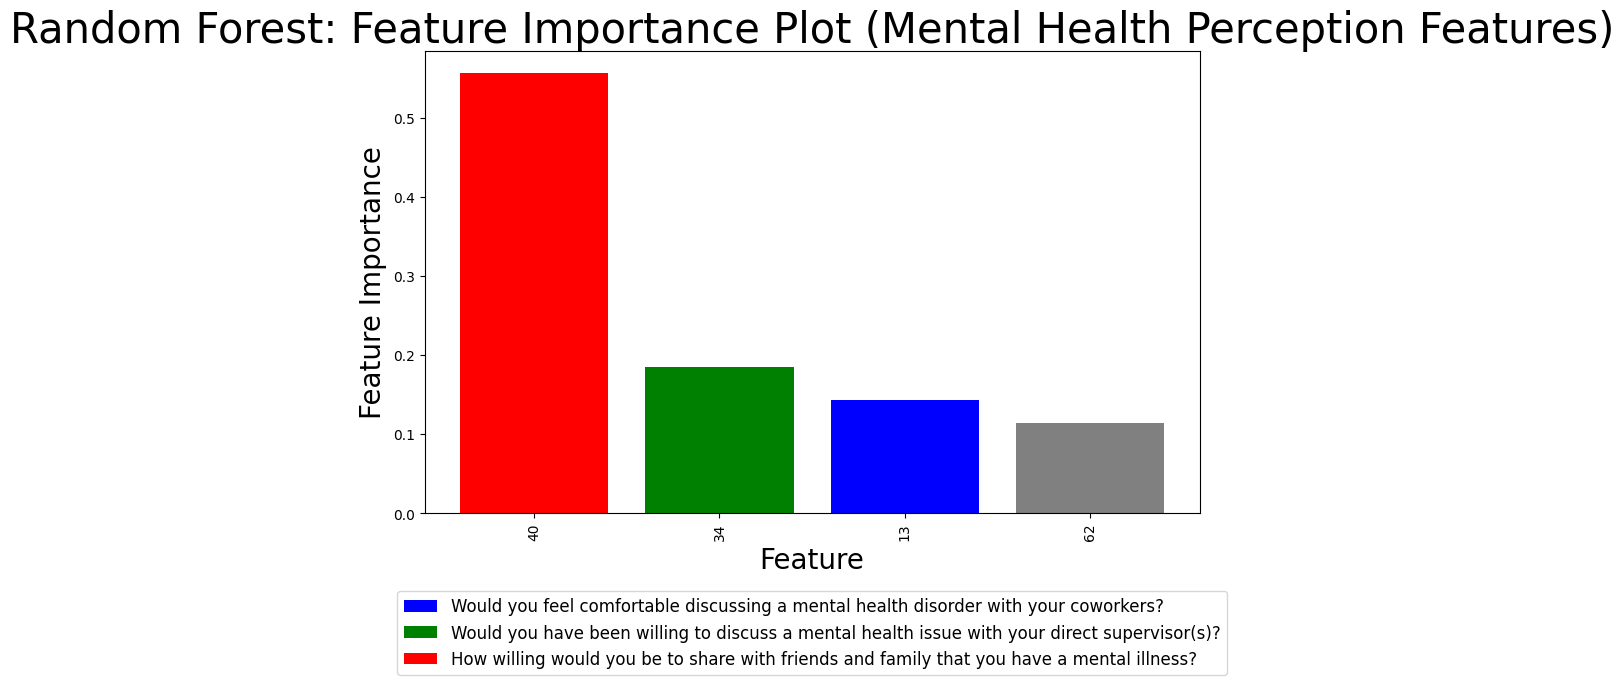

In [47]:
# Get the coefficients and feature names from the random forest model
rfcFeatureImportance = randomForestPerception.feature_importances_
features = dfPerception.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
rfcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(rfcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
rfcDataFramePlot = rfcDataFramePlot.reindex(rfcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = rfcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(rfcDataFramePlot['Feature'], rfcDataFramePlot['Coefficient'], color='grey')
for i in range(len(rfcDataFramePlot)):
    if rfcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(rfcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'How willing would you be to share with friends and family that you have a mental illness?'
        elif idx == 1:
            label = 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'
        else:
            label = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
        ax.bar(rfcDataFramePlot['Feature'][i], rfcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Random Forest: Feature Importance Plot (Mental Health Perception Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()



##Decision Tree

In [48]:
# create a decision forest object
decisionTreePerception = DecisionTreeClassifier(random_state=42)

# train the model on the training data
decisionTreePerception.fit(dfPerception, dfCombinedVectorized['45'])



DecisionTreeClassifier(random_state=42)

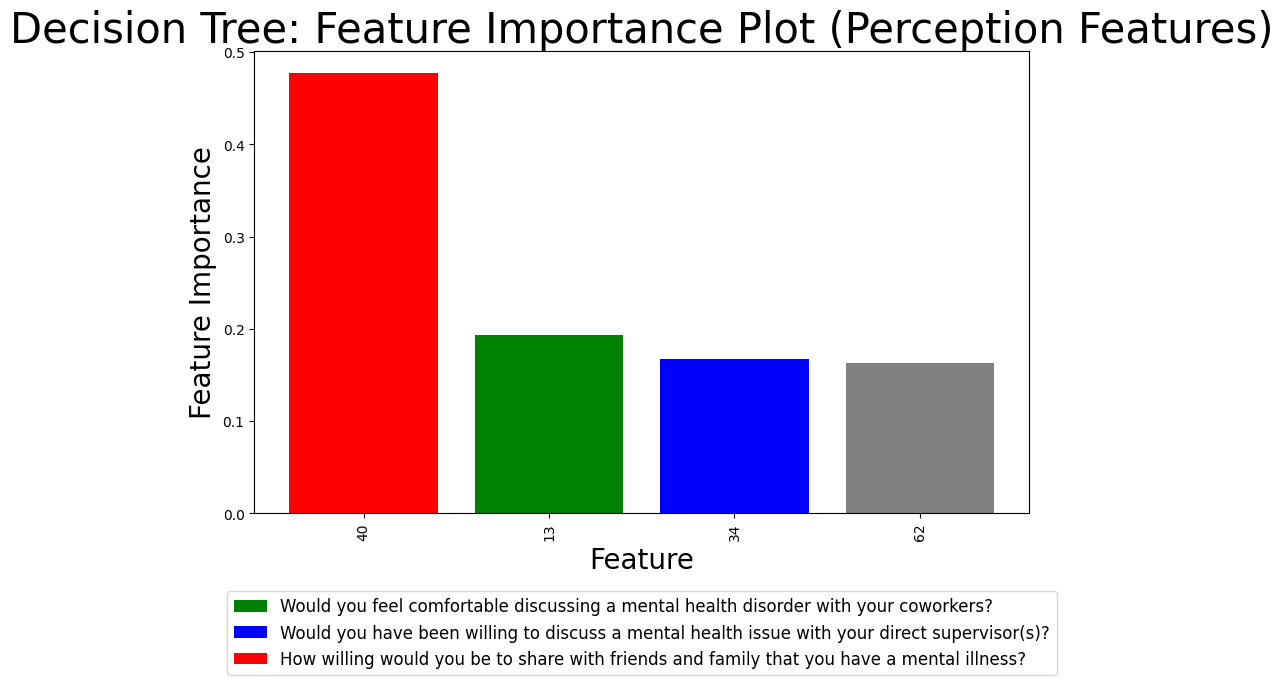

In [50]:
# Get the coefficients and feature names from the random forest model
dtcFeatureImportance = decisionTreePerception.feature_importances_
features = dfPerception.columns

# Create a pandas dataframe to store the absolute coefficients and feature names
dtcDataFramePlot = pd.DataFrame({'Feature': features, 'Coefficient': abs(dtcFeatureImportance)})

# Sort the coefficients in descending order of magnitude
dtcDataFramePlot = dtcDataFramePlot.reindex(dtcDataFramePlot['Coefficient'].sort_values(ascending=False).index)

# Get the top 3 features with the highest absolute coefficients
top3Features = dtcDataFramePlot['Feature'][:3].tolist()

# Assign colors to the top 3 features
colors = ['red', 'green', 'blue']

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dtcDataFramePlot['Feature'], dtcDataFramePlot['Coefficient'], color='grey')
for i in range(len(dtcDataFramePlot)):
    if dtcDataFramePlot['Feature'][i] in top3Features:
        idx = top3Features.index(dtcDataFramePlot['Feature'][i])
        if idx == 0:
            label = 'How willing would you be to share with friends and family that you have a mental illness?'
        elif idx == 1:
            label = 'Would you feel comfortable discussing a mental health disorder with your coworkers?'
        else:
            label = 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'
        ax.bar(dtcDataFramePlot['Feature'][i], dtcDataFramePlot['Coefficient'][i], color=colors[idx], label=label)
ax.set_xlabel('Feature', fontsize = 20)
ax.set_ylabel('Feature Importance',fontsize = 20)
ax.set_title('Decision Tree: Feature Importance Plot (Perception Features)', fontsize = 30)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', fontsize='large')
plt.show()
